# Aula 01 - Introdução à Análise de Dados com Python

### Tópicos Abordados:

#### 1. Aálise Exploratória de dados (EDA): Técnicas para compreender a estrutura, padrões e distribuição das variáveis.
#### 2. Tratamento de dados  ausentes (missing values) e valores discrepantes (outliers): estratégias para lidar com dados incompletos ou inconsistentes.

## Base de dados

# Passo 1: Configurando ambinte de desenvolvimento

### Instalação das bibliotecas

In [9]:
%pip install -q pandas sqlalchemy sqlalchemy-utils psycopg2-binary openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -q seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists,create_database
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import psycopg2
import warnings

warnings.filterwarnings('ignore')

## Passo 2: Extração de dados (EXTRACT)

In [54]:
path = r'dados/dirtyshop.xlsx'
df_dirtyshop = pd.read_excel(path)

print('Head:')
display(df_dirtyshop.head())
print('info:')
display(df_dirtyshop.info())

Head:


,CLIENTE,STATUS,IDADE,UNIFED,RESID,TMPRSD,FONE,ECIV,INSTRU,RNDTOT,RST
0,CLI_0001,mau,44.0,MG,PROP,5.0,1,CAS,SEC,6040,sim
1,CLI_0002,bom,46.0,MG,ALUG,12.0,1,CAS,SUP,6986,sim
2,CLI_0003,bom,56.0,MG,PROP,12.0,1,CAS,SUP,8797,sim
3,CLI_0004,bom,31.0,RJ,ALUG,4.0,1,CAS,SEC,4968,sim
4,CLI_0005,bom,46.0,RJ,PROP,8.0,1,CAS,NaN,7430,sim


info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CLIENTE  2800 non-null   object 
 1   STATUS   2800 non-null   object 
 2   IDADE    2797 non-null   float64
 3   UNIFED   2800 non-null   object 
 4   RESID    2692 non-null   object 
 5   TMPRSD   2795 non-null   float64
 6   FONE     2800 non-null   int64  
 7   ECIV     2800 non-null   object 
 8   INSTRU   2062 non-null   object 
 9   RNDTOT   2800 non-null   int64  
 10  RST      2800 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 240.8+ KB


None

In [55]:
# Exibe a quantidade de linhas e colunas do DataFrame
print(f"Dimensão do DataFrame: {df_dirtyshop.shape}")

# Separador visual
print("\n" + "="*40 + "\n")

# Exibe informações gerais sobre cada coluna: tipo de dado, valores não nulos, etc.
print("Informações gerais por coluna:")
df_dirtyshop.info()

Dimensão do DataFrame: (2800, 11)


Informações gerais por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CLIENTE  2800 non-null   object 
 1   STATUS   2800 non-null   object 
 2   IDADE    2797 non-null   float64
 3   UNIFED   2800 non-null   object 
 4   RESID    2692 non-null   object 
 5   TMPRSD   2795 non-null   float64
 6   FONE     2800 non-null   int64  
 7   ECIV     2800 non-null   object 
 8   INSTRU   2062 non-null   object 
 9   RNDTOT   2800 non-null   int64  
 10  RST      2800 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 240.8+ KB


## Passo 3: Transformação e análise dos dados

In [56]:
variaveis_quantitativas = df_dirtyshop.select_dtypes(include=['number']).columns.tolist()
print(f"Variáveis Quantitativas: {variaveis_quantitativas}")

Variáveis Quantitativas: ['IDADE', 'TMPRSD', 'FONE', 'RNDTOT']


In [57]:
variaveis_qualitativas = df_dirtyshop.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Variáveis Qualitativa: {variaveis_qualitativas}")

Variáveis Qualitativa: ['CLIENTE', 'STATUS', 'UNIFED', 'RESID', 'ECIV', 'INSTRU', 'RST']


### Análise das variáveis qualitativa ou categoricas

In [58]:
df_dirtyshop.describe(include='object')

,CLIENTE,STATUS,UNIFED,RESID,ECIV,INSTRU,RST
count,2800,2800,2800,2692,2800,2062,2800
unique,2800,2,6,4,7,3,3
top,CLI_0001,bom,RJ,PROP,CAS,SUP,sim
freq,1,1948,1318,2179,1758,1252,2467


### Análise de variáveç 'STATUS'

In [59]:
# Transformando dados em maiúsculo
df_dirtyshop['STATUS'] = df_dirtyshop['STATUS'].str.upper()

In [60]:
# Contagem de frequência para cada categoria da variável 'STATUS'
print(df_dirtyshop["STATUS"].value_counts(dropna=False))

# maneira elegante de apresentar os resultados
print(f"\nTotal de registros na classe: {df_dirtyshop['STATUS'].value_counts(dropna=False).sum()}")
print(f"Total de registros na base: {df_dirtyshop.shape[0]}")

STATUS
BOM    1948
MAU     852
Name: count, dtype: int64

Total de registros na classe: 2800
Total de registros na base: 2800


### Análise de variável UNIFED:

In [61]:
# Contagem de frequência para cada categoria da variável 'UNIFED'
print(df_dirtyshop["UNIFED"].value_counts(dropna=False))

# maneira elegante de apresentar os resultados
print(f"\nTotal de registros na classe: {df_dirtyshop['UNIFED'].value_counts(dropna=False).sum()}")
print(f"Total de registros na base: {df_dirtyshop.shape[0]}")

UNIFED
RJ      1318
SC       787
MG       544
SP       149
S.P.       1
BH         1
Name: count, dtype: int64

Total de registros na classe: 2800
Total de registros na base: 2800


In [62]:
# substitui os valores da coluna 'UNIFED'
df_dirtyshop["UNIFED"] =  df_dirtyshop["UNIFED"].replace({
    'S.P.':'SP',
    'BH':'MG'
})

In [63]:
# Contagem de frequência para cada categoria da variável 'UNIFED'
print(df_dirtyshop['UNIFED'].value_counts(dropna=False))

UNIFED
RJ    1318
SC     787
MG     545
SP     150
Name: count, dtype: int64


In [64]:
# verificando os valores em formato de tabela e por proporção
# df["UNIFED"].value_counts(normalize=True).reset_index().rename(columns={"count":"QTDE"})

df_dirtyshop["UNIFED"].value_counts(normalize=True)\
    .reset_index()\
    .rename(columns={"proportion":"Proporção"})\
    .sort_values(by="Proporção", ascending=False)

,UNIFED,Proporção
0,RJ,0.470714
1,SC,0.281071
2,MG,0.194643
3,SP,0.053571


### Análisenado Variável RESID:

In [65]:
# Contagem de frequência para cada categoria da variável 'RESID'
print(df_dirtyshop["RESID"].value_counts(dropna=False))

# maneira elegante de apresentar os resultados
print(f"\nTotal de registros na classe: {df_dirtyshop['RESID'].value_counts(dropna=False).sum()}")
print(f"Total de registros na base: {df_dirtyshop.shape[0]}")

RESID
PROP    2179
ALUG     324
OUTR     188
NaN      108
pROP       1
Name: count, dtype: int64

Total de registros na classe: 2800
Total de registros na base: 2800


In [66]:
# substitui os valores da coluna 'RESID'
df_dirtyshop["RESID"] = df_dirtyshop["RESID"].replace({
    'PROP':'PROPRIA',
    'ALUG':'ALUGADA',
    'OUTR':'OUTROS',
    'pROP':'PROPRIA'
})

In [67]:
# Contagem de frequência para cada categoria da variável 'RESID'
print(df_dirtyshop["RESID"].value_counts(dropna=False))

# maneira elegante de apresentar os resultados
print(f"\nTotal de registros na classe: {df_dirtyshop['RESID'].value_counts(dropna=False).sum()}")
print(f"Total de registros na base: {df_dirtyshop.shape[0]}")

RESID
PROPRIA    2180
ALUGADA     324
OUTROS      188
NaN         108
Name: count, dtype: int64

Total de registros na classe: 2800
Total de registros na base: 2800


In [68]:
# fillna substitui valores NaN por String
df_dirtyshop['RESID'].fillna('NAO INFORMADO',inplace=True)

In [69]:
# Contagem de frequência para cada categoria da variável 'RESID'
print(df_dirtyshop["RESID"].value_counts(dropna=False))

RESID
PROPRIA          2180
ALUGADA           324
OUTROS            188
NAO INFORMADO     108
Name: count, dtype: int64


### Análise da variável ECIV:

In [70]:
# Contagem de frequência para cada categoria da variável 'RESID'
print(df_dirtyshop["ECIV"].value_counts(dropna=False))

# maneira elegante de apresentar os resultados
print(f"\nTotal de registros na classe: {df_dirtyshop['ECIV'].value_counts(dropna=False).sum()}")
print(f"Total de registros na base: {df_dirtyshop.shape[0]}")

ECIV
CAS       1758
SOLT       657
DIVORC     251
VIUVO       87
NI          40
OUTROS       6
CASAD        1
Name: count, dtype: int64

Total de registros na classe: 2800
Total de registros na base: 2800


In [71]:
# Corrigindo nomenclaturas de ECIV:
df_dirtyshop['ECIV'] = df_dirtyshop['ECIV'].replace({'CAS':'CASADO','CASAD':'CASADO','DIVORC':'DIVORCIADO','SOLT':'SOLTEIRO', 'NI':'OUTROS'})

In [72]:
# Contagem de frequência para cada categoria da variável 'ECIV'
print(df_dirtyshop["ECIV"].value_counts(dropna=False))

ECIV
CASADO        1759
SOLTEIRO       657
DIVORCIADO     251
VIUVO           87
OUTROS          46
Name: count, dtype: int64


### Análise a Variável INSTRU:

In [73]:
# Contagem de frequência para cada categoria da variável 'INSTRU'
print(df_dirtyshop["INSTRU"].value_counts(dropna=False))

# maneira elegante de apresentar os resultados
print(f"\nTotal de registros na classe: {df_dirtyshop['INSTRU'].value_counts(dropna=False).sum()}")
print(f"Total de registros na base: {df_dirtyshop.shape[0]}")

INSTRU
SUP     1252
NaN      738
SEC      670
PRIM     140
Name: count, dtype: int64

Total de registros na classe: 2800
Total de registros na base: 2800


In [74]:
# substitui os valores da coluna 'INSTRU'
df_dirtyshop["INSTRU"] = df_dirtyshop["INSTRU"].replace({
    'SUP':'SUPERIOR',
    'SEC':'ENSINO MEDIO',
    'PRIM':'ENSINO FUNDAMENTAL',
}).fillna("NAO INFORMADO")

In [75]:
# Contagem de frequência para cada categoria da variável 'INSTRU'
print(df_dirtyshop["INSTRU"].value_counts(dropna=False))

INSTRU
SUPERIOR              1252
NAO INFORMADO          738
ENSINO MEDIO           670
ENSINO FUNDAMENTAL     140
Name: count, dtype: int64


### Análise da Variável RST:

In [76]:
# Contagem de frequência para cada categoria da variável 'RST'
print(df_dirtyshop["RST"].value_counts(dropna=False))

# maneira elegante de apresentar os resultados
print(f"\nTotal de registros na classe: {df_dirtyshop['RST'].value_counts(dropna=False).sum()}")
print(f"Total de registros na base: {df_dirtyshop.shape[0]}")

RST
sim    2467
nao     331
2         2
Name: count, dtype: int64

Total de registros na classe: 2800
Total de registros na base: 2800


In [ ]:
df_dirtyshop.loc[df_dirtyshop["RST"] == 2, "RST"] = "NAO INFORMADO"

In [81]:
df_dirtyshop['RST'] = df_dirtyshop["RST"].str.upper()

df_dirtyshop.head()

,CLIENTE,STATUS,IDADE,UNIFED,RESID,TMPRSD,FONE,ECIV,INSTRU,RNDTOT,RST
0,CLI_0001,MAU,44.0,MG,PROPRIA,5.0,1,CASADO,ENSINO MEDIO,6040,SIM
1,CLI_0002,BOM,46.0,MG,ALUGADA,12.0,1,CASADO,SUPERIOR,6986,SIM
2,CLI_0003,BOM,56.0,MG,PROPRIA,12.0,1,CASADO,SUPERIOR,8797,SIM
3,CLI_0004,BOM,31.0,RJ,ALUGADA,4.0,1,CASADO,ENSINO MEDIO,4968,SIM
4,CLI_0005,BOM,46.0,RJ,PROPRIA,8.0,1,CASADO,NAO INFORMADO,7430,SIM


## Análise das variáveis numéricas ou quantitativas

### Análise da variável IDADE:

In [82]:
print(f"Variáveis Quantitativas: {variaveis_quantitativas}")

Variáveis Quantitativas: ['IDADE', 'TMPRSD', 'FONE', 'RNDTOT']


In [83]:
df_dirtyshop.describe()

,IDADE,TMPRSD,FONE,RNDTOT
count,2797.000000,2795.000000,2800.000000,2800.000000
mean,42.402574,11.693739,0.929286,6645.136071
std,14.196867,9.026007,0.280355,1545.728336
min,0.000000,0.000000,0.000000,2239.000000
25%,31.000000,5.000000,1.000000,5478.750000
50%,40.000000,10.000000,1.000000,6500.500000
75%,53.000000,16.000000,1.000000,7681.000000
max,89.000000,57.000000,2.000000,23258.000000


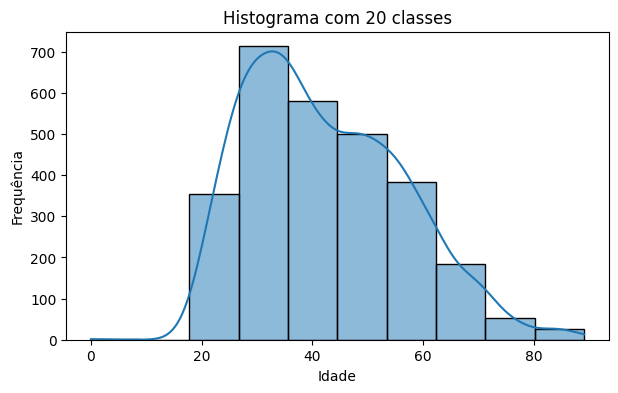

In [85]:
# histograma
fig = plt.figure(figsize=(7,4))
sns.histplot(data=df_dirtyshop, x="IDADE", bins=10, kde=True)

plt.title("Histograma com 20 classes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

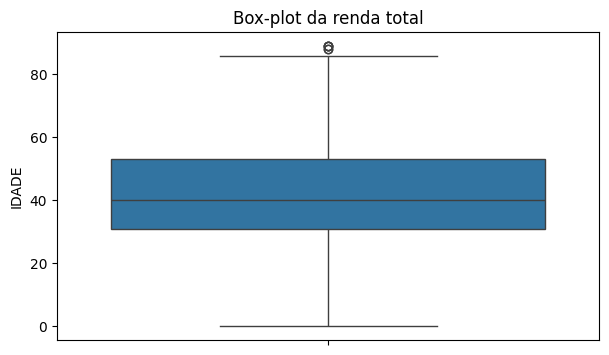

In [86]:
# boxplot
fig = plt.figure(figsize=(7,4))
sns.boxplot(data=df_dirtyshop, y="IDADE")
plt.title("Box-plot da renda total")
plt.show()

In [87]:
# inputação de valores para os registros com idade menor que 18 (usar a média das idades)
df_dirtyshop[df_dirtyshop["IDADE"] < 19]

,CLIENTE,STATUS,IDADE,UNIFED,RESID,TMPRSD,FONE,ECIV,INSTRU,RNDTOT,RST
642,CLI_0643,MAU,18.0,SC,PROPRIA,8.0,1,SOLTEIRO,NAO INFORMADO,4766,SIM
922,CLI_0923,BOM,18.0,SC,OUTROS,12.0,0,SOLTEIRO,ENSINO MEDIO,4003,SIM
1090,CLI_1091,MAU,18.0,SC,PROPRIA,8.0,1,SOLTEIRO,NAO INFORMADO,3869,SIM
1219,CLI_1220,BOM,18.0,SC,OUTROS,12.0,0,SOLTEIRO,ENSINO MEDIO,3334,SIM
1466,CLI_1467,BOM,18.0,RJ,NAO INFORMADO,13.0,0,OUTROS,NAO INFORMADO,3439,SIM
1495,CLI_1496,BOM,18.0,RJ,NAO INFORMADO,13.0,0,OUTROS,NAO INFORMADO,4521,SIM
1573,CLI_1574,BOM,18.0,RJ,PROPRIA,18.0,1,SOLTEIRO,ENSINO MEDIO,4489,SIM
1888,CLI_1889,BOM,18.0,SP,PROPRIA,8.0,1,SOLTEIRO,SUPERIOR,3969,SIM
2248,CLI_2249,BOM,18.0,RJ,PROPRIA,18.0,1,SOLTEIRO,ENSINO MEDIO,4060,SIM
2364,CLI_2365,MAU,0.0,MG,PROPRIA,4.0,1,DIVORCIADO,ENSINO MEDIO,2239,SIM


In [88]:
# inputação de valores para os registros com idade menor que 18 (usar a média das idades)
idade_media = df_dirtyshop["IDADE"].mean()
print(f"Idade média: {idade_media}")

Idade média: 42.40257418662853


In [94]:
df_dirtyshop.groupby(['RESID', "ECIV"])['IDADE'].mean().reset_index()

,RESID,ECIV,IDADE
0,ALUGADA,CASADO,37.835165
1,ALUGADA,DIVORCIADO,40.840000
2,ALUGADA,OUTROS,37.000000
3,ALUGADA,SOLTEIRO,32.902439
4,ALUGADA,VIUVO,53.750000
5,NAO INFORMADO,CASADO,45.250000
6,NAO INFORMADO,DIVORCIADO,43.400000
7,NAO INFORMADO,OUTROS,35.000000
8,NAO INFORMADO,SOLTEIRO,28.133333
9,NAO INFORMADO,VIUVO,71.000000


In [92]:
df_selecionado = df_dirtyshop[(df_dirtyshop["RESID"] == "PROPRIA") & (df_dirtyshop["ECIV"] == "DIVORCIADO")]
idade_media = df_selecionado["IDADE"].mean()
print(f"IDade média: {idade_media}")

IDade média: 46.93604651162791


In [93]:
# atualizando a idade dos clientes com menos de 18 anos para idade média
df_dirtyshop.loc[df_dirtyshop["IDADE"] < 18, "IDADE" ] = idade_media

In [99]:
df_dirtyshop[df_dirtyshop["IDADE"].isnull()]

,CLIENTE,STATUS,IDADE,UNIFED,RESID,TMPRSD,FONE,ECIV,INSTRU,RNDTOT,RST
2234,CLI_2235,MAU,NaN,MG,PROPRIA,7.0,1,CASADO,NAO INFORMADO,5792,SIM
2423,CLI_2424,BOM,NaN,MG,PROPRIA,16.0,1,CASADO,SUPERIOR,9509,SIM
2712,CLI_2713,BOM,NaN,MG,PROPRIA,3.0,1,CASADO,ENSINO FUNDAMENTAL,7045,SIM


In [100]:
df_selecionado_nan = df_dirtyshop[(df_dirtyshop["RESID"] == "PROPRIA") & (df_dirtyshop["ECIV"] == "CASADO")]
idade_media_nan = df_selecionado_nan["IDADE"].mean()

print(f"IDade média: {idade_media_nan}")

IDade média: 46.59652777777778


In [101]:
df_dirtyshop['IDADE'].fillna(idade_media_nan,inplace=True)

In [102]:
df_dirtyshop[df_dirtyshop["IDADE"].isnull()]

,CLIENTE,STATUS,IDADE,UNIFED,RESID,TMPRSD,FONE,ECIV,INSTRU,RNDTOT,RST


In [103]:
df_dirtyshop.isnull().sum()

CLIENTE    0
STATUS     0
IDADE      0
UNIFED     0
RESID      0
TMPRSD     5
FONE       0
ECIV       0
INSTRU     0
RNDTOT     0
RST        0
dtype: int64

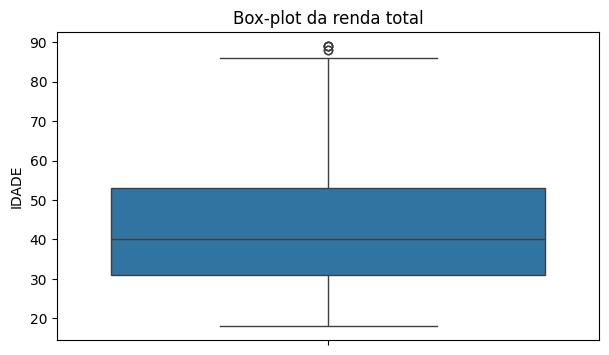

In [104]:
# boxplot
fig = plt.figure(figsize=(7,4))
sns.boxplot(data=df_dirtyshop, y="IDADE")
plt.title("Box-plot da renda total")
plt.show()

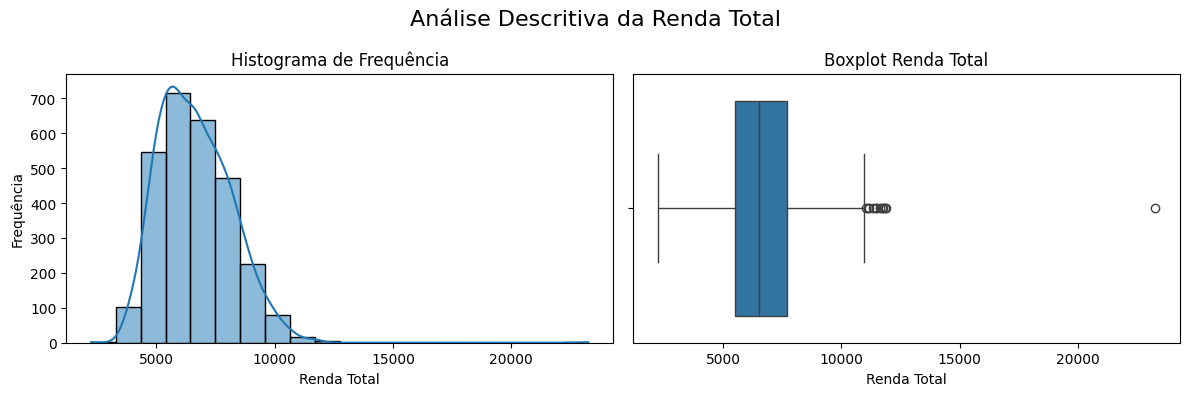

In [105]:
# 1. Criar a figura e os eixos (subplots)
# plt.subplots(nrows=1, ncols=2, ...) cria uma grade com 1 linha e 2 colunas.
# Isso retorna a figura inteira (fig) e um array com os eixos (axes).
# axes[0] será o primeiro gráfico (esquerda) e axes[1] o segundo (direita).
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4)) # Aumentei o tamanho da figura para caber os dois gráficos

fig.suptitle('Análise Descritiva da Renda Total', fontsize=16)

# 2. Desenhar o primeiro gráfico (Histograma) no primeiro eixo (axes[0])
sns.histplot(data=df_dirtyshop, x="RNDTOT", bins=20, kde=True, ax=axes[0])
axes[0].set_title("Histograma de Frequência")
axes[0].set_xlabel("Renda Total")
axes[0].set_ylabel("Frequência")

# 3. Desenhar o segundo gráfico (Boxplot) no segundo eixo (axes[1])
sns.boxplot(data=df_dirtyshop, x="RNDTOT", ax=axes[1])
axes[1].set_title("Boxplot Renda Total") 
axes[1].set_xlabel("Renda Total") 

# 4. Ajustar o layout e exibir a figura
plt.tight_layout(rect=[0, 0, 1, 1]) # Ajusta o espaçamento para não sobrepor títulos
plt.show()

In [107]:
df_dirtyshop[df_dirtyshop['RNDTOT'] > 15000]

,CLIENTE,STATUS,IDADE,UNIFED,RESID,TMPRSD,FONE,ECIV,INSTRU,RNDTOT,RST
1739,CLI_1740,BOM,21.0,SP,ALUGADA,3.0,1,CASADO,ENSINO MEDIO,23258,SIM


In [117]:
df_gby_rtt = df_dirtyshop.groupby(["RESID","ECIV", "INSTRU"])['RNDTOT'].mean().reset_index()
df_gby_rtt

,RESID,ECIV,INSTRU,RNDTOT
0,ALUGADA,CASADO,ENSINO FUNDAMENTAL,6806.083333
1,ALUGADA,CASADO,ENSINO MEDIO,6163.642857
2,ALUGADA,CASADO,NAO INFORMADO,6519.550000
3,ALUGADA,CASADO,SUPERIOR,6177.540541
4,ALUGADA,DIVORCIADO,ENSINO FUNDAMENTAL,6672.250000
...,...,...,...,...
58,PROPRIA,SOLTEIRO,SUPERIOR,5618.976077
59,PROPRIA,VIUVO,ENSINO FUNDAMENTAL,9060.750000
60,PROPRIA,VIUVO,ENSINO MEDIO,7690.500000
61,PROPRIA,VIUVO,NAO INFORMADO,9153.291667


In [119]:
df_gby_rtt = df_dirtyshop.groupby(['RESID', "ECIV", "INSTRU"])['RNDTOT'].median().reset_index()

In [115]:
df_gby_rtt[(df_gby_rtt["RESID"] =="ALUGADA") & (df_gby_rtt["ECIV"] == "CASADO") & (df_gby_rtt["INSTRU"] == "ENSINO MEDIO") ]

,RESID,ECIV,INSTRU,RNDTOT
1,ALUGADA,CASADO,ENSINO MEDIO,6163.642857


In [120]:
df_gby_rtt[(df_gby_rtt["RESID"] =="ALUGADA") & (df_gby_rtt["ECIV"] == "CASADO") & (df_gby_rtt["INSTRU"] == "ENSINO MEDIO") ]

,RESID,ECIV,INSTRU,RNDTOT
1,ALUGADA,CASADO,ENSINO MEDIO,5644.0


In [122]:
df_mdiana = df_gby_rtt[(df_gby_rtt["RESID"] =="ALUGADA") & (df_gby_rtt["ECIV"] == "CASADO") & (df_gby_rtt["INSTRU"] == "ENSINO MEDIO") ]
df_mdiana

,RESID,ECIV,INSTRU,RNDTOT
1,ALUGADA,CASADO,ENSINO MEDIO,5644.0


In [123]:
valor_mediana = df_mdiana["RNDTOT"]
valor_mediana

1    5644.0
Name: RNDTOT, dtype: float64

In [125]:
# atualizando a idade dos clientes com menos de 18 anos para idade média
df_dirtyshop.loc[df_dirtyshop["RNDTOT"] > 15000, "RNDTOT"] = valor_mediana

In [126]:
df_dirtyshop[df_dirtyshop["RNDTOT"] > 15000]

,CLIENTE,STATUS,IDADE,UNIFED,RESID,TMPRSD,FONE,ECIV,INSTRU,RNDTOT,RST
